In [8]:
# notebooks/example_notebook.ipynb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import sys
import os
import warnings
sys.path.append(os.path.abspath('../scripts'))

In [6]:
from utils import save_insurance_data_to_csv
warnings.filterwarnings("ignore")

In [7]:
# Example usage
text_file_path = '../data/insurance_data.txt'  # Replace with your actual file path
save_insurance_data_to_csv(text_file_path)

Data saved to c:\Users\lenovo\Documents\10acadmy\Car-Insurance\data\insurance_text_data.csv


In [9]:
# Load the data
csv_file_path = '../data/insurance_text_data.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [10]:
# Descriptive statistics for numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
descriptive_stats = df[numerical_columns].describe()
print(descriptive_stats)


       TotalPremium   TotalClaims    SumInsured  CalculatedPremiumPerTerm
count  1.000098e+06  1.000098e+06  1.000098e+06              1.000098e+06
mean   6.190550e+01  6.486119e+01  6.041727e+05              1.178757e+02
std    2.302845e+02  2.384075e+03  1.508332e+06              3.997017e+02
min   -7.825768e+02 -1.200241e+04  1.000000e-02              0.000000e+00
25%    0.000000e+00  0.000000e+00  5.000000e+03              3.224800e+00
50%    2.178333e+00  0.000000e+00  7.500000e+03              8.436900e+00
75%    2.192982e+01  0.000000e+00  2.500000e+05              9.000000e+01
max    6.528260e+04  3.930921e+05  1.263620e+07              7.442217e+04


In [11]:
# Check data types for all columns
dtypes = df.dtypes
print(dtypes)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

### Check for Missing Values:

In [13]:
# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

print("Missing Values and Percentages:")
print(missing_percentage.to_markdown(numalign="left", stralign="left"))


Missing Values and Percentages:
|                          | 0          |
|:-------------------------|:-----------|
| UnderwrittenCoverID      | 0          |
| PolicyID                 | 0          |
| TransactionMonth         | 0          |
| IsVATRegistered          | 0          |
| Citizenship              | 0          |
| LegalType                | 0          |
| Title                    | 0          |
| Language                 | 0          |
| Bank                     | 14.5947    |
| AccountType              | 4.02281    |
| MaritalStatus            | 0.825819   |
| Gender                   | 0.953507   |
| Country                  | 0          |
| Province                 | 0          |
| PostalCode               | 0          |
| MainCrestaZone           | 0          |
| SubCrestaZone            | 0          |
| ItemType                 | 0          |
| mmcode                   | 0.0551946  |
| VehicleType              | 0.0551946  |
| RegistrationYear         | 0          |
| 

In [14]:
# Define your groups (A and B)
group_a = df[df['Gender'] == 'Male']['TotalClaims']
group_b = df[df['Gender'] == 'Female']['TotalClaims']

In [15]:
# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b, nan_policy='omit')

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.24803623812388725
P-value: 0.8041073961270343


### Univariate Analysis (Histograms for Numerical Columns)

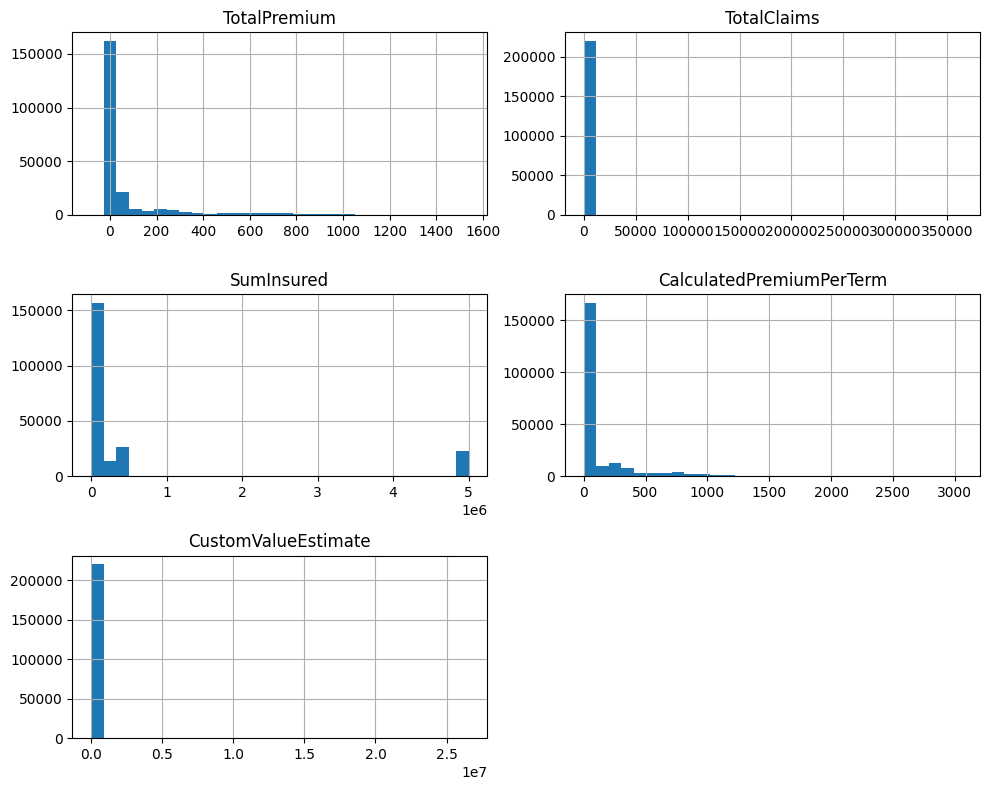

In [18]:
# Plot histograms for numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'CustomValueEstimate']
df[numerical_columns].dropna().hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
# df['CoverCategory'].value_counts().plot(kind='bar',figsize=(10, 6))
# plt.title("Distribution of CoverCategory")
# plt.ylabel("Count")
# plt.show()


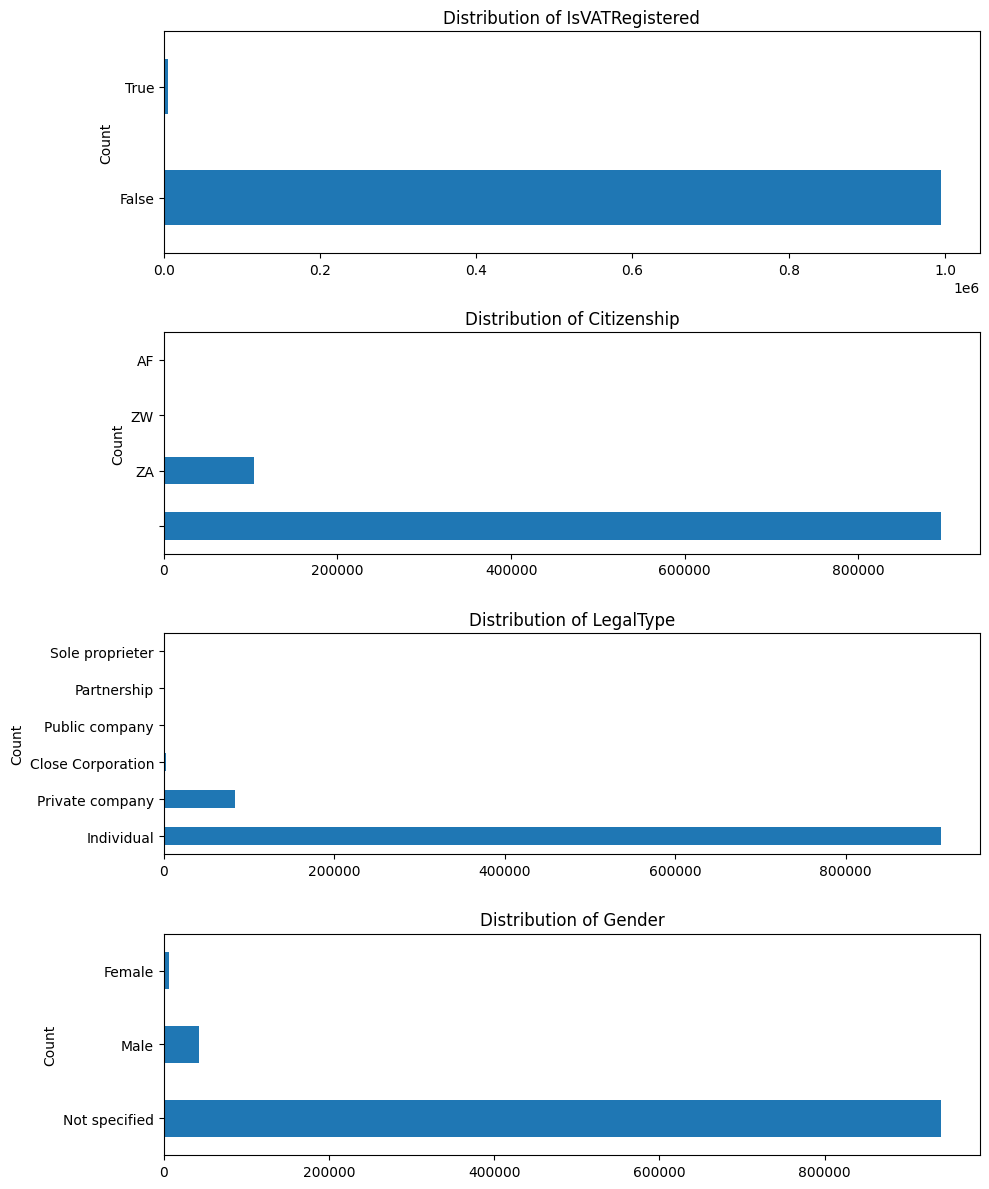

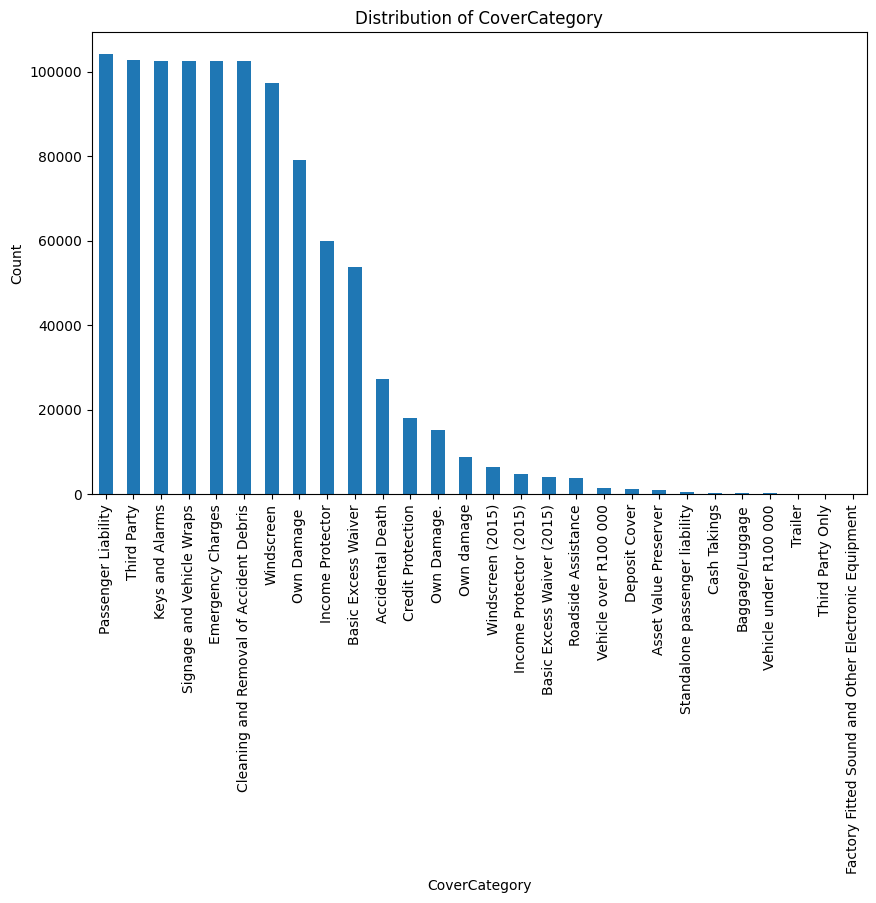

In [19]:
# Plot bar charts for categorical columns
categorical_columns = ['IsVATRegistered', 'Citizenship', 'LegalType', 'Gender']
fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(10, 12))

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='barh', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

df['CoverCategory'].value_counts().plot(kind='bar',figsize=(10, 6))
plt.title("Distribution of CoverCategory")
plt.ylabel("Count")
plt.show()

### Correlations and Associations

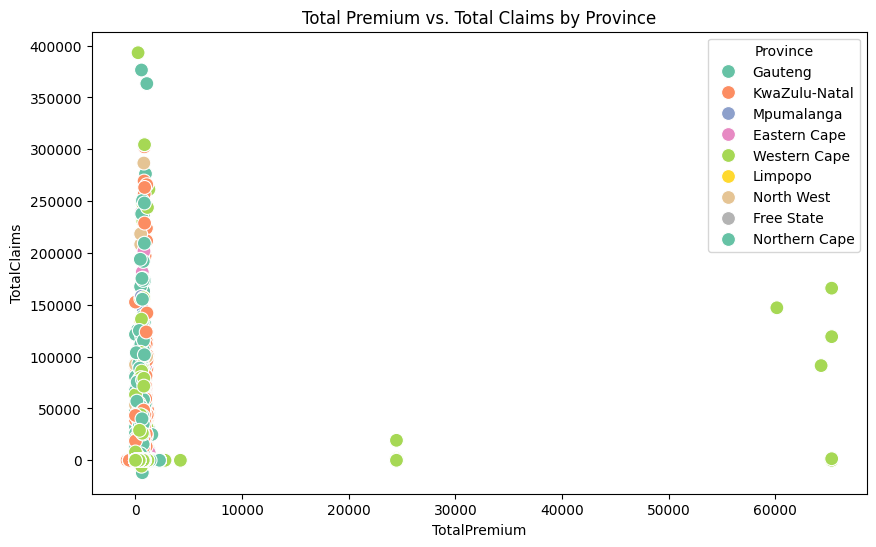

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=df, palette='Set2', s=100)
plt.title('Total Premium vs. Total Claims by Province')
plt.show()

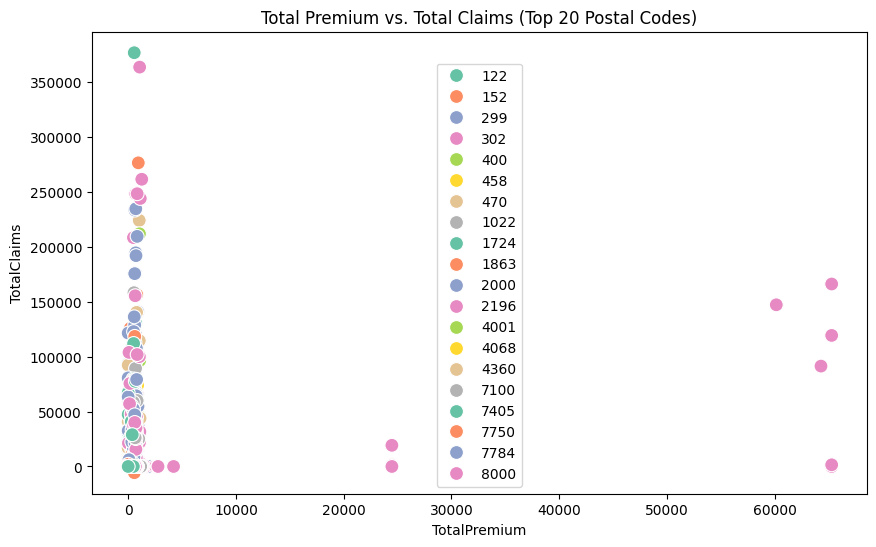

In [23]:
# Get the top 20 most frequent postal codes
top_postal_codes = df['PostalCode'].value_counts().index[:20]

# Filter the data to include only the top postal codes
filtered_df = df[df['PostalCode'].isin(top_postal_codes)]

# Scatter plot with limited PostalCodes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=filtered_df, palette='Set2', s=100)
plt.title('Total Premium vs. Total Claims (Top 20 Postal Codes)')
plt.legend()
plt.show()

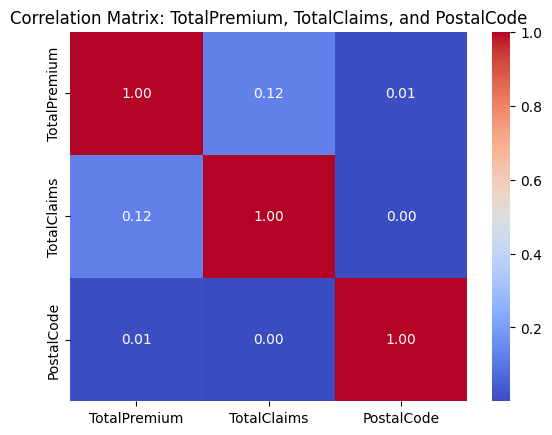

In [24]:
# Correlation matrix for TotalPremium, TotalClaims, and PostalCode
correlation_matrix = df[['TotalPremium', 'TotalClaims', 'PostalCode']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: TotalPremium, TotalClaims, and PostalCode')
plt.show()

### Trends Over Geography (Geographical Comparisons):

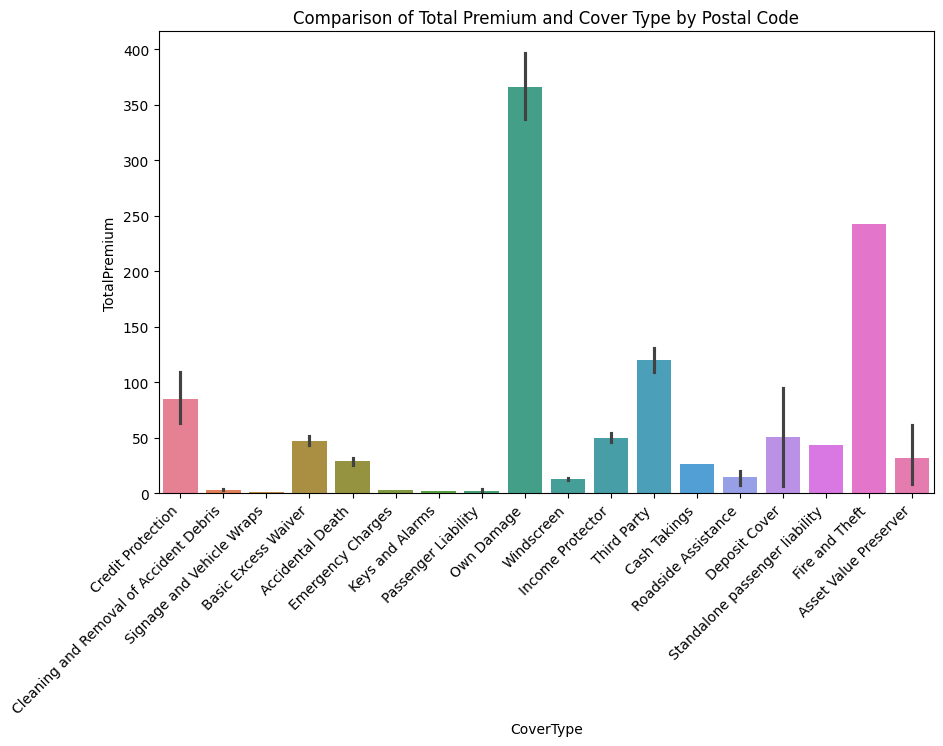

In [25]:
df_sampled = df.sample(5000) 
# Get the top 20 most frequent cover type
top_cover_type = df['CoverType'].value_counts().index[:10]
# Filter the data to include only the top cover type
filtered_Covertype_df = df[df['CoverType'].isin(top_cover_type)]
# Bar plot to compare Cover Type and Premium across Postal Codes
plt.figure(figsize=(10, 6))
sns.barplot(x='CoverType', y='TotalPremium', hue='CoverType', data=df_sampled)
plt.title('Comparison of Total Premium and Cover Type by Postal Code')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Outlier Detection (Using Box Plots)

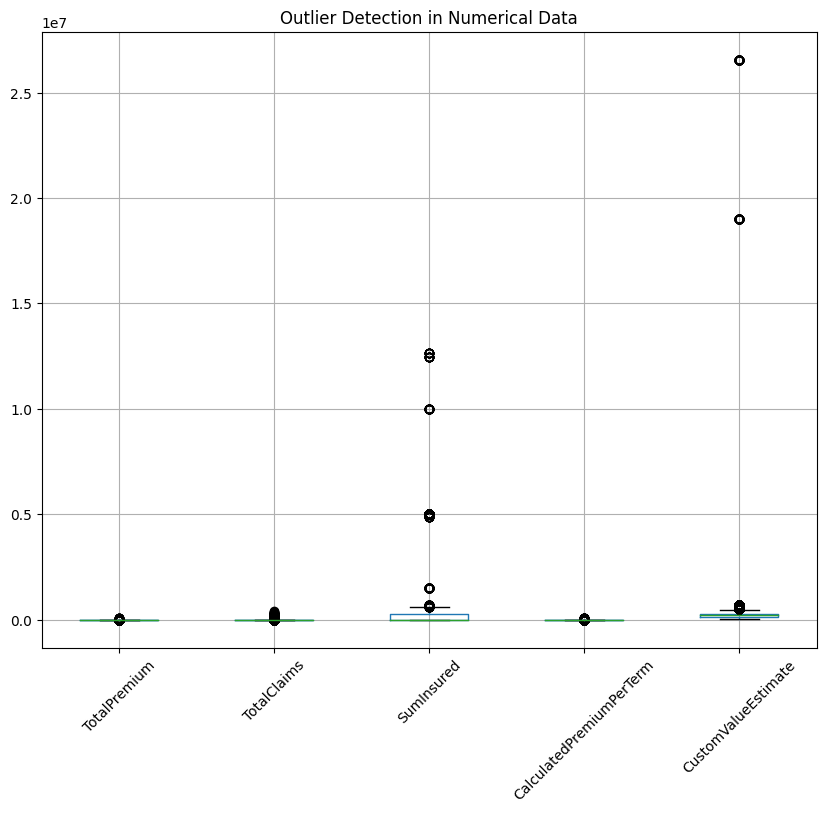

In [26]:
# Box plots for outlier detection in numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'CustomValueEstimate']
plt.figure(figsize=(10, 8))
df[numerical_columns].boxplot()
plt.title('Outlier Detection in Numerical Data')
plt.xticks(rotation=45)
plt.show()

### Heatmap for Correlations Across Variables:

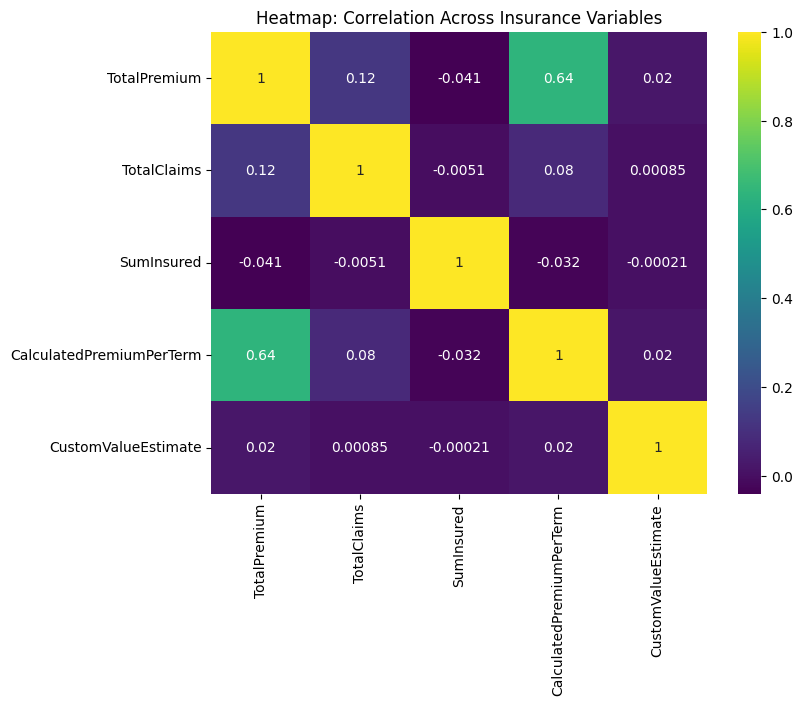

In [27]:
# Heatmap for correlation across all relevant numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'CustomValueEstimate']].corr(), annot=True, cmap='viridis')
plt.title('Heatmap: Correlation Across Insurance Variables')
plt.show()

### Trend Lines Across Vehicle Make and Premium:

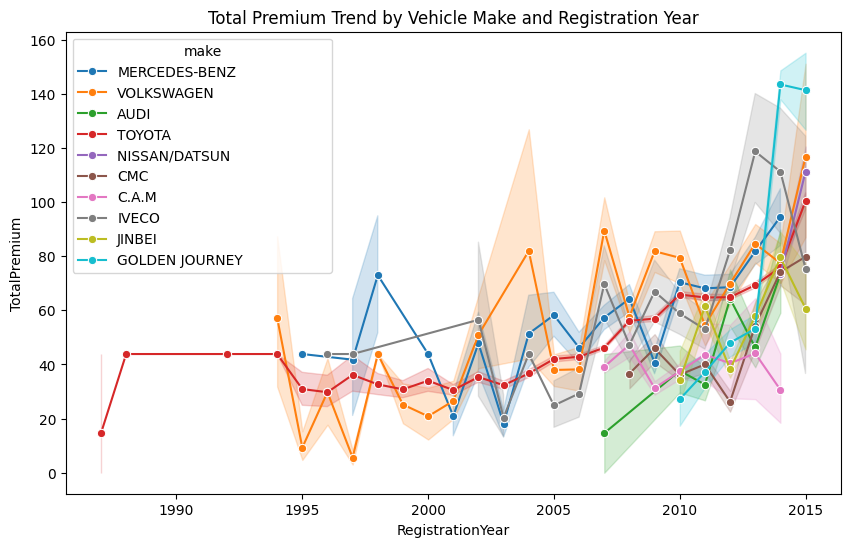

In [30]:
# Get the top 20 most frequent postal codes
top_make = df['make'].value_counts().index[:10]

# Filter the data to include only the top postal codes
filtered_make_df = df[df['make'].isin(top_make)]
#Line plot for TotalPremium by Make and Registration Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='RegistrationYear', y='TotalPremium', hue='make', data=filtered_make_df, marker='o')
plt.title('Total Premium Trend by Vehicle Make and Registration Year')
plt.show()

### Box Plot by Auto Make for Premium Comparison:

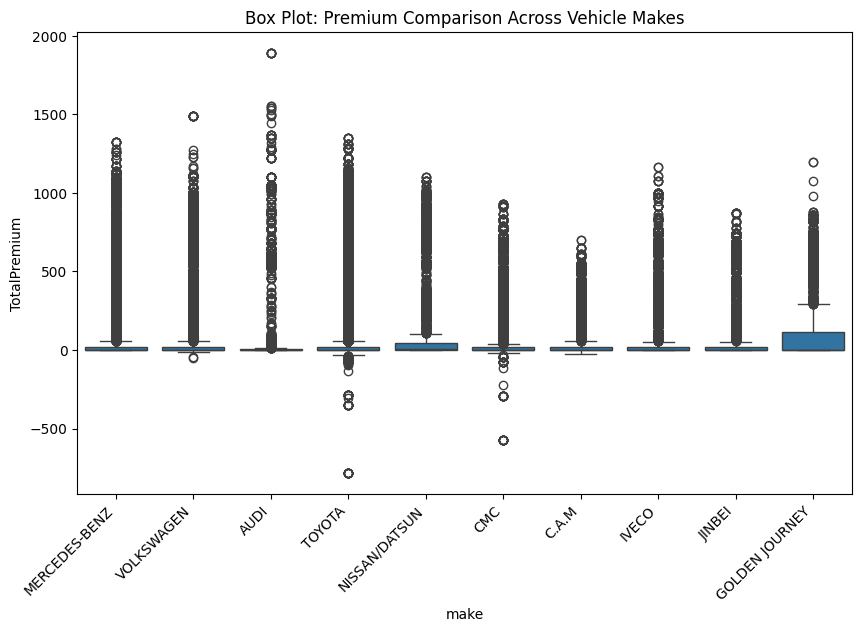

In [41]:
# Box plot to compare TotalPremium across different vehicle makes
plt.figure(figsize=(10, 6))
# Assuming you have a DataFrame called filtered_make_df
make_column = df['make']
# Trim leading and trailing whitespace
trimmed_make = make_column.str.strip()
# Replace the original column (optional)
filtered_make_df['make'] = trimmed_make

sns.boxplot(x='make', y='TotalPremium', data=filtered_make_df)
plt.title('Box Plot: Premium Comparison Across Vehicle Makes')
plt.xticks(rotation = 45,ha='right')
plt.show()

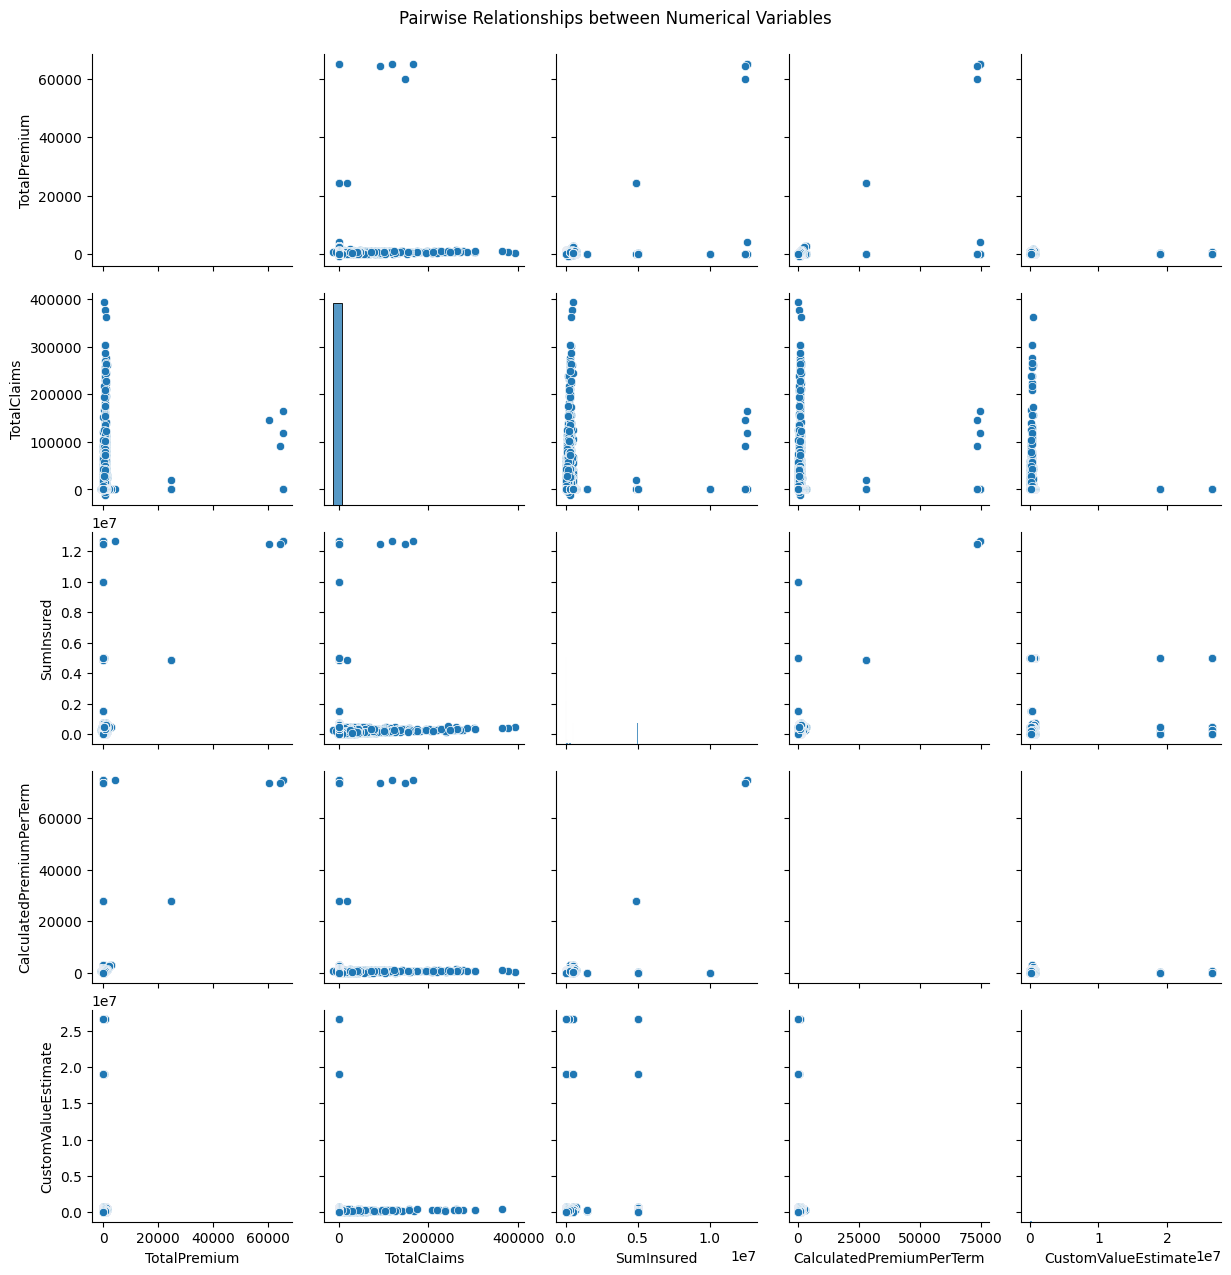

In [42]:
# Pairplot to show pairwise relationships between numerical variables
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairwise Relationships between Numerical Variables', y=1.02)
plt.show()

### Monthly Premiums and Claims

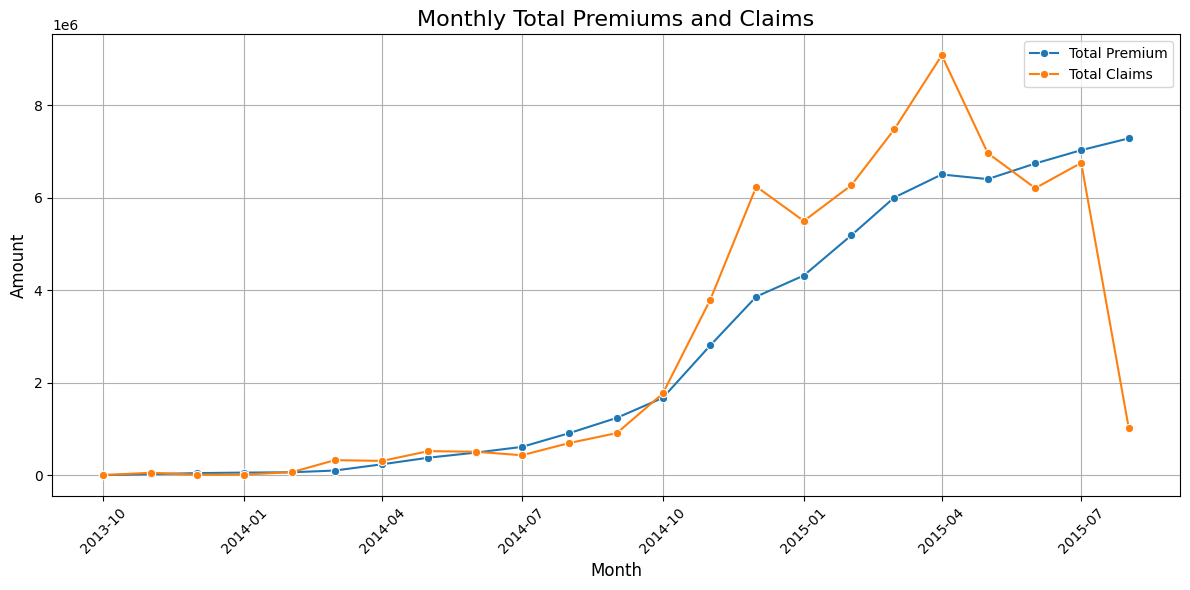

In [46]:
# Ensure 'TransactionMonth' is converted to datetime format without specifying the format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Group by month and calculate the total premiums and claims
monthly_data = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).reset_index()

# Convert 'TransactionMonth' back to datetime for plotting purposes
monthly_data['TransactionMonth'] = monthly_data['TransactionMonth'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionMonth', y='TotalPremium', data=monthly_data, label='Total Premium', marker='o')
sns.lineplot(x='TransactionMonth', y='TotalClaims', data=monthly_data, label='Total Claims', marker='o')

# Enhancing the plot
plt.title('Monthly Total Premiums and Claims', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()